In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


## For the "Median value of owner-occupied homes" provide a boxplot


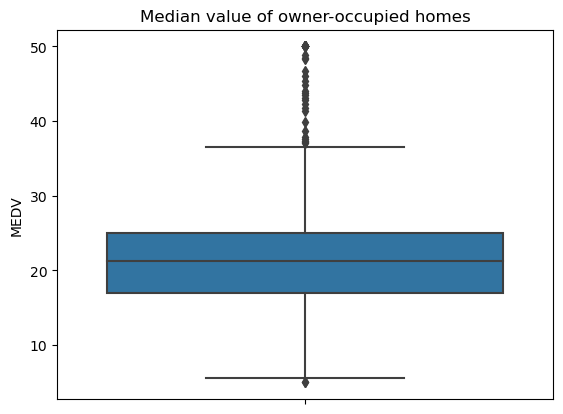

In [4]:
ax = sns.boxplot(y="MEDV", data=boston_df).set(title='Median value of owner-occupied homes')
plt.show()

## Provide a  bar plot for the Charles river variable

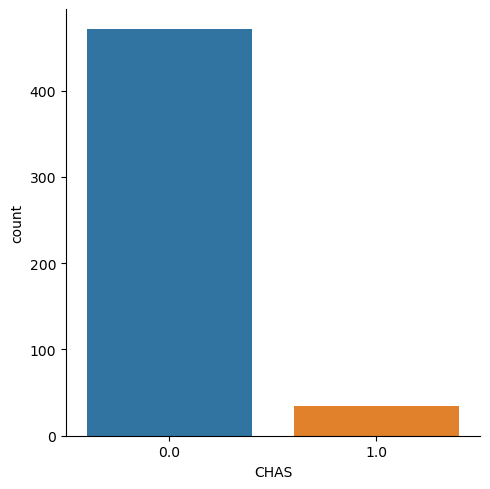

In [5]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.show()

## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)



In [9]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

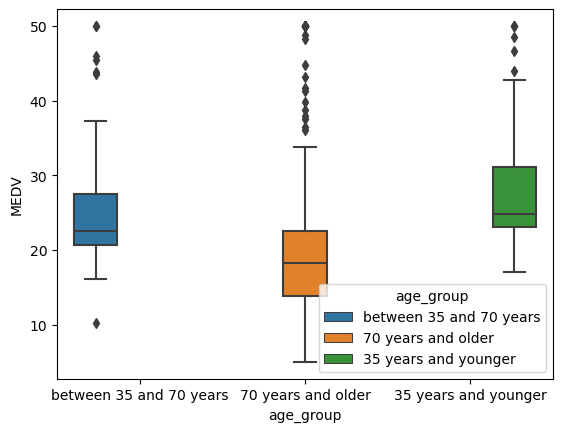

In [12]:
av = sns.boxplot(x="age_group", y="MEDV", hue="age_group",
                 data=boston_df)
plt.show()

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

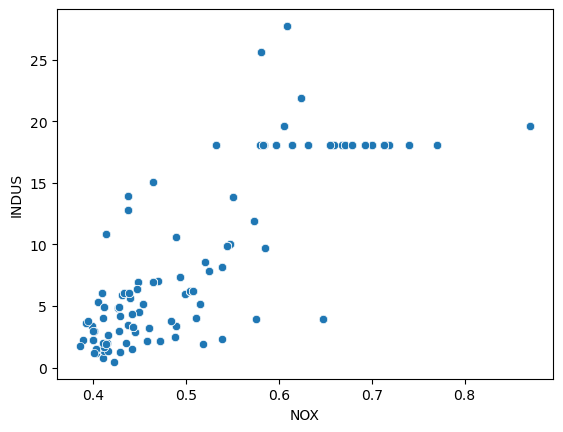

In [15]:
ag = sns.scatterplot(x='NOX', y='INDUS',
                     data=boston_df)
plt.show()

**We can see that there is a dependency between NOX and INDUS (the less NOX, the less INDUS)**

## Create a histogram for the pupil to teacher ratio variable

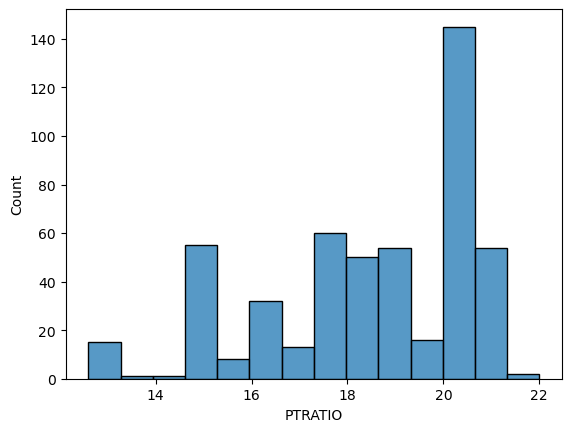

In [16]:
ap = sns.histplot(data=boston_df, x="PTRATIO")
plt.show()

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [21]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

# since the p-value is less than 0.05 we can not assume equality of variance



LeveneResult(statistic=8.751904896045998, pvalue=0.003238119367639829)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value between bounded and unbounded by Charles river houses")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value between bounded and unbounded by Charles river houses")

In [22]:

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)



Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

**Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses based on Charls River**

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
*   $H\_1:$ At least one of the means differ


In [23]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')
# since the p-value is more than 0.05, the variance are equal

LeveneResult(statistic=2.780620029374844, pvalue=0.06295337343259205)

In [24]:
# Separate samples
lower35 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
between3570 = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
older70 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [25]:
# One-Way ANOVA
f_statistic, p_value = scipy.stats.f_oneway(lower35, between3570, older70)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at least one of the means differ.**

## Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis:

*   $H\_0:$ NOX is not correlated with INDUS
*   $H\_1:$ NOX is correlated with INDUS


In [30]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])



(0.7636514469209151, 7.913361061238693e-98)

**Since the p-value < 0.05, we reject the Null hypothesis and conclude that there exists a relationship between NOX and INDUS.
Moreover, we can see, that there is strong positive correlation**

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

State the hypothesis:

*   $H\_0:$ DIS is not correlated with MEDV
*   $H\_1:$ DIS is correlated with MEDV

In [31]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 24 Feb 2023   Prob (F-statistic):           1.21e-08
Time:                        18:12:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**p < 0.05 there is evidence of correlation between DIS and MEDV**